# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Reading Data

In [3]:
df= pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [4]:
df = df.sample(n=15000, random_state=1)

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [5]:
#the head of the data
df.head(10)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
85289,2016-2017,1306022,Special Ed AM Run,2501,K298,Other,19002,12/07/2016 07:40:00 AM,12/07/2016 07:45:00 AM,Brooklyn,...,20-30 min,7,Yes,Yes,No,12/07/2016 07:45:00 AM,NaN,12/07/2016 07:45:31 AM,Running Late,School-Age
70609,2016-2017,1291304,Special Ed PM Run,GC0122,X940,Heavy Traffic,08524,10/07/2016 03:45:00 PM,10/07/2016 03:51:00 PM,Bronx,...,15MINS,0,Yes,Yes,Yes,10/07/2016 03:51:00 PM,NaN,10/07/2016 03:51:42 PM,Running Late,School-Age
147078,2016-2017,1358262,General Ed AM Run,`1721,Q8369,Heavy Traffic,29036,06/15/2017 07:52:00 AM,06/15/2017 07:53:00 AM,Queens,...,10-20,4,Yes,No,No,06/15/2017 07:53:00 AM,NaN,06/15/2017 07:54:04 AM,Running Late,School-Age
71604,2016-2017,1292292,Pre-K/EI,9302,1,Heavy Traffic,C814,10/14/2016 07:07:00 AM,10/14/2016 07:08:00 AM,Bronx,...,30 minutes,2,Yes,Yes,No,10/14/2016 07:08:00 AM,NaN,10/14/2016 07:08:32 AM,Running Late,Pre-K
53227,2015-2016,1273597,Special Ed AM Run,2113,Y821,Heavy Traffic,07065,06/06/2016 07:45:00 AM,06/06/2016 08:01:00 AM,Manhattan,...,10 mins,1,Yes,Yes,No,06/06/2016 08:01:00 AM,NaN,06/06/2016 08:06:16 AM,Running Late,School-Age
17871,2015-2016,1237361,Special Ed AM Run,1314,P572,Heavy Traffic,25912,12/17/2015 07:50:00 AM,12/17/2015 08:36:00 AM,NaN,...,15 min,4,Yes,Yes,Yes,12/17/2015 08:36:00 AM,NaN,12/17/2015 08:36:22 AM,Running Late,School-Age
25414,2015-2016,1245245,Special Ed AM Run,5870,Q094,Weather Conditions,26213,01/26/2016 07:23:00 AM,01/26/2016 07:26:00 AM,Queens,...,20mins,0,Yes,Yes,Yes,01/26/2016 07:26:00 AM,NaN,01/26/2016 07:26:35 AM,Running Late,School-Age
142692,2015-2016,1252687,Special Ed AM Run,2710,Q137,Heavy Traffic,29134,02/29/2016 07:39:00 AM,02/29/2016 07:42:00 AM,Queens,...,20mins,2,Yes,Yes,Yes,02/29/2016 07:42:00 AM,NaN,02/29/2016 07:42:59 AM,Running Late,School-Age
146148,2016-2017,1338664,Special Ed AM Run,NI2106,K152,Heavy Traffic,20104,04/06/2017 06:22:00 AM,04/06/2017 06:24:00 AM,Brooklyn,...,35 MINUTES,0,Yes,Yes,No,04/06/2017 06:24:00 AM,NaN,04/06/2017 06:24:05 AM,Running Late,School-Age
113275,2016-2017,1334517,Special Ed AM Run,TN0315,Q702,Heavy Traffic,30442,03/27/2017 07:50:00 AM,03/27/2017 07:54:00 AM,Queens,...,45 mins,0,No,Yes,No,03/27/2017 07:54:00 AM,NaN,03/27/2017 07:54:09 AM,Running Late,School-Age


In [6]:
#sample of the data
df.sample(10)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
41295,2015-2016,1261524,Special Ed AM Run,1630,M537,Heavy Traffic,02436,04/11/2016 07:46:00 AM,04/11/2016 07:49:00 AM,Manhattan,...,15 mins,6,Yes,Yes,Yes,04/11/2016 07:49:00 AM,2874315,04/11/2016 08:10:06 AM,Running Late,School-Age
86639,2016-2017,1307388,Special Ed AM Run,1316,M516,Heavy Traffic,02699,12/12/2016 07:56:00 AM,12/12/2016 07:59:00 AM,Manhattan,...,20-25 MINS,3,Yes,Yes,No,12/12/2016 07:59:00 AM,NaN,12/12/2016 07:59:07 AM,Running Late,School-Age
144951,2016-2017,1305364,Special Ed PM Run,21281,M753,Heavy Traffic,02611,12/05/2016 04:25:00 PM,12/05/2016 04:39:00 PM,Manhattan,...,20,0,Yes,Yes,Yes,12/05/2016 04:39:00 PM,NaN,12/05/2016 04:39:55 PM,Running Late,School-Age
1231,2015-2016,1241876,Pre-K/EI,365,3,Heavy Traffic,C375,01/14/2016 07:38:00 AM,01/14/2016 07:39:00 AM,Bronx,...,30 MINS,5,Yes,Yes,No,01/14/2016 07:39:00 AM,NaN,01/14/2016 07:39:13 AM,Running Late,Pre-K
116127,2016-2017,1337357,Special Ed PM Run,NI0820,K295,Heavy Traffic,19002,04/03/2017 02:16:00 PM,04/03/2017 02:23:00 PM,Brooklyn,...,30MN,5,Yes,Yes,No,04/03/2017 02:23:00 PM,NaN,04/03/2017 02:23:35 PM,Running Late,School-Age
21717,2015-2016,1241348,Special Ed PM Run,8806D,P691,Heavy Traffic,26806,01/12/2016 01:50:00 PM,01/12/2016 02:00:00 PM,Queens,...,15MINS,0,Yes,Yes,No,01/12/2016 02:00:00 PM,NaN,01/12/2016 02:00:22 PM,Running Late,School-Age
127353,2016-2017,1348831,Special Ed AM Run,84D,P613,Flat Tire,30901,05/16/2017 06:27:00 AM,05/16/2017 06:34:00 AM,Bronx,...,NaN,0,Yes,Yes,No,05/16/2017 06:34:00 AM,NaN,05/16/2017 06:34:12 AM,Breakdown,School-Age
82389,2016-2017,1303148,Special Ed AM Run,1620,M879,Heavy Traffic,02699,11/29/2016 07:53:00 AM,11/29/2016 07:54:00 AM,Manhattan,...,25mnts,4,Yes,Yes,No,11/29/2016 07:54:00 AM,NaN,11/29/2016 07:54:50 AM,Running Late,School-Age
27670,2015-2016,1235313,Pre-K/EI,9349,5,Other,C465,12/09/2015 08:15:00 AM,12/09/2015 08:19:00 AM,Bronx,...,10MINS,9,Yes,Yes,No,12/09/2015 08:19:00 AM,NaN,12/09/2015 08:19:50 AM,Running Late,Pre-K
81152,2016-2017,1301915,General Ed AM Run,2503,Q2920,Heavy Traffic,29109,11/22/2016 07:45:00 AM,11/22/2016 07:46:00 AM,Queens,...,20 min,7,Yes,Yes,No,11/22/2016 07:46:00 AM,NaN,11/22/2016 07:46:46 AM,Running Late,School-Age


In [7]:
#Summary statistics
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.500000e+04,15000.000000
mean,1.287689e+06,3.055133
std,4.325880e+04,29.804527
min,1.212695e+06,0.000000
25%,1.250453e+06,0.000000
50%,1.287794e+06,0.000000
75%,1.325340e+06,4.000000
max,1.362605e+06,2905.000000


In [8]:
df.shape

(15000, 21)

In [9]:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Run_Type,object
Bus_No,object
Route_Number,object
Reason,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Boro,object


In [10]:
#Check for missing values
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,9
Bus_No,0
Route_Number,7
Reason,8
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,618


In [11]:
#Check for duplicate values
df.duplicated().sum()

0

#Distribution of features

In [12]:
#Categorical feature analysis

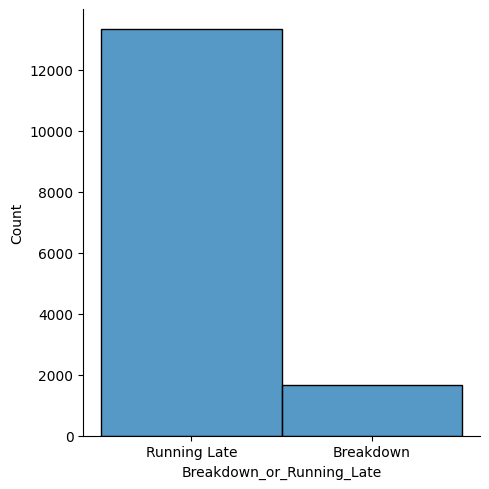

In [13]:
sns.displot(df, x="Breakdown_or_Running_Late") # imbalnced data for target

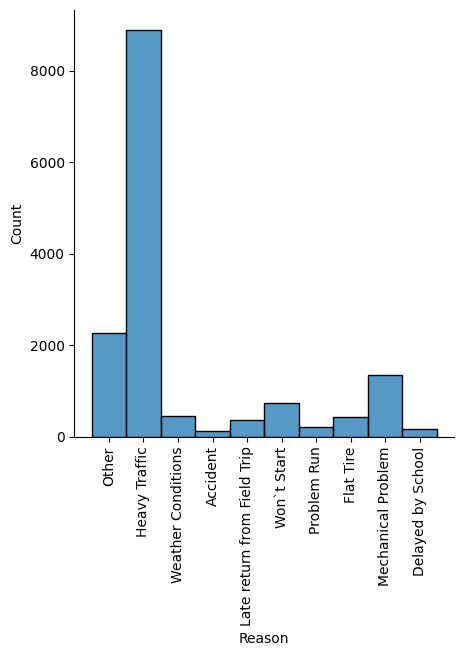

In [14]:
sns.displot(df, x="Reason")
plt.xticks(rotation=90)
plt.show()

## Heavy Traffic اكثر تأثير

In [15]:
##Correlation matrix

<Axes: ylabel='Number_Of_Students_On_The_Bus'>

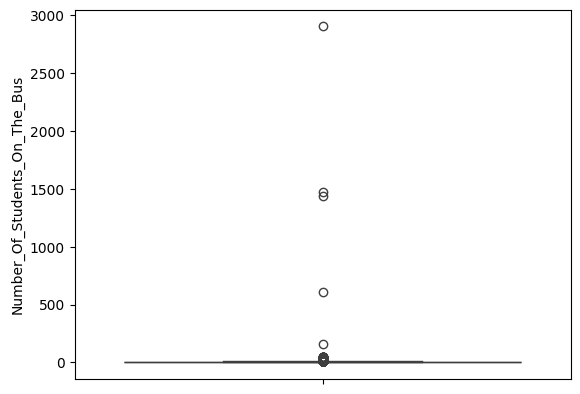

In [16]:
#Outlier detection
sns.boxplot(df['Number_Of_Students_On_The_Bus'])

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data==> there is no duplicated V


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [17]:
#Dropping columns
df = df.drop(['Busbreakdown_ID','Bus_No'], axis=1)


In [18]:
df = df.drop(['Schools_Serviced'], axis=1)

# Handle Missing Values

In [19]:
#Dropping columns
df = df.drop(['Incident_Number'], axis=1)

In [20]:
print(df.groupby('Run_Type').size())

Run_Type
General Ed AM Run          1738
General Ed Field Trip        66
General Ed PM Run           432
Pre-K/EI                   2162
Project Read AM Run           4
Project Read Field Trip       1
Project Read PM Run          23
Special Ed AM Run          8712
Special Ed Field Trip        68
Special Ed PM Run          1785
dtype: int64


In [21]:
print(df.groupby('Boro').size())

Boro
All Boroughs         29
Bronx              4175
Brooklyn           3642
Connecticut          11
Manhattan          2943
Nassau County       188
New Jersey           91
Queens             2100
Rockland County      46
Staten Island       695
Westchester         462
dtype: int64


In [22]:
print(df.groupby('Route_Number').size())

Route_Number
0101A    1
0102A    1
0103A    1
0104A    1
0106A    4
        ..
Y991     5
Y993     1
Y995     1
Y996     1
Y997     3
Length: 5726, dtype: int64


In [23]:
print(df.groupby('How_Long_Delayed').size())

How_Long_Delayed
-------       1
0             5
0000          1
016224        1
1 1/2 HR      1
             ..
MAYBE 1/2     1
\1 hr-        1
est. 20min    2
traffic       1
unk           1
Length: 682, dtype: int64


In [24]:
print(df['How_Long_Delayed'].str.split().str[0].unique())

['20-30' '15MINS' '10-20' '30' '10' '15' '20mins' '35' '45' '20' '1' '25'
 nan '5' '2' '20min' '25mins' '20MIN' '45MINS' '20-30mins' '20MNTS'
 '20-25' '15MIN' '10-15' '40min' '20-30MINS' '25MINS' '5minutes' '15Min'
 '30MINS' '30MNS' '60' '15-20' '40' '5MINUTES' '5/8' '90' '40-45' '0000'
 '15min' '20MINS' '20mnts' '10-15MINS' '1HR' '10MIN' '45min' '5-10'
 '25min' '30MIN' '30mn' '30mins' '15-20MINS' '15mins' '30-60' '45mins'
 '??????????' '30/35' '10minutes' '20MNS' '25-30' '?' '45-60' '45MIN' '16'
 '30-40' '30MNTS' '60MIN' '35MIN' '45mnts' '5MINUTES.' '8' '10-12'
 '120MINUTES' '25-30MINS' '40MIN' '10MINUTES' '5-10MINS' '35-40' '25MIN'
 '10MINS' '10-15MIINS' '30min' '????????' '11' '25mn' '55' '25MNTS'
 '10-15mins' '25-35' '???????' '1hr' '10/15' '30Min' '40MINS' '30-35'
 '30-40mints' '40Min' '10MNS' '5MINS' '5minutes.' '10mins' '50' '10min'
 '35-45' '20-25MINS' '1HOUR' '15/20MINS' '5-10MIINS' '15MNS' '15-' '30-45'
 '45min-1' '40mn' '1H15MIN' 'est.' '3' '30MN' '146' '??????' '15-30MINS'


In [25]:
# df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace(' min', '', regex=False)

In [26]:
#Impute missing values
df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode().iloc[0])

df['Route_Number'] = df['Route_Number'].fillna(df['Route_Number'].mode().iloc[0])

df['How_Long_Delayed'] = df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode().iloc[0])

In [27]:
df['Boro'] = df['Boro'].fillna(df['Boro'].mode().iloc[0])

In [28]:
df['Reason'] = df['Reason'].fillna(df['Reason'].mode().iloc[0])

In [29]:
df.isnull().sum()

,0
School_Year,0
Run_Type,0
Route_Number,0
Reason,0
Occurred_On,0
Created_On,0
Boro,0
Bus_Company_Name,0
How_Long_Delayed,0
Number_Of_Students_On_The_Bus,0


# Feature Engineering

In [30]:
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df["Year_Occurred_On"]= df['Occurred_On'].dt.year
df["Month_Occurred_On"]= df['Occurred_On'].dt.month
df["Date_no_Occurred_On"]= df['Occurred_On'].dt.day
df["Hour_Occurred_On"]= df['Occurred_On'].dt.hour
df["Day_Occurred_On"]= df.Occurred_On.dt.strftime("%A")
df = df.drop(['Occurred_On'], axis=1)
df.head()

,School_Year,Run_Type,Route_Number,Reason,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,...,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Year_Occurred_On,Month_Occurred_On,Date_no_Occurred_On,Hour_Occurred_On,Day_Occurred_On
85289,2016-2017,Special Ed AM Run,K298,Other,12/07/2016 07:45:00 AM,Brooklyn,EMPIRE STATE BUS CORP.,20-30 min,7,Yes,...,No,12/07/2016 07:45:00 AM,12/07/2016 07:45:31 AM,Running Late,School-Age,2016,12,7,7,Wednesday
70609,2016-2017,Special Ed PM Run,X940,Heavy Traffic,10/07/2016 03:51:00 PM,Bronx,G.V.C. LTD. (B2192),15MINS,0,Yes,...,Yes,10/07/2016 03:51:00 PM,10/07/2016 03:51:42 PM,Running Late,School-Age,2016,10,7,15,Friday
147078,2016-2017,General Ed AM Run,Q8369,Heavy Traffic,06/15/2017 07:53:00 AM,Queens,EMPIRE STATE BUS CORP.,10-20,4,Yes,...,No,06/15/2017 07:53:00 AM,06/15/2017 07:54:04 AM,Running Late,School-Age,2017,6,15,7,Thursday
71604,2016-2017,Pre-K/EI,1,Heavy Traffic,10/14/2016 07:08:00 AM,Bronx,"G.V.C., LTD.",30 minutes,2,Yes,...,No,10/14/2016 07:08:00 AM,10/14/2016 07:08:32 AM,Running Late,Pre-K,2016,10,14,7,Friday
53227,2015-2016,Special Ed AM Run,Y821,Heavy Traffic,06/06/2016 08:01:00 AM,Manhattan,"MONTAUK STUDENT TRANS, IN",10 mins,1,Yes,...,No,06/06/2016 08:01:00 AM,06/06/2016 08:06:16 AM,Running Late,School-Age,2016,6,6,7,Monday


In [31]:
df = df.drop(['Created_On'], axis=1)
df.head()

,School_Year,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Year_Occurred_On,Month_Occurred_On,Date_no_Occurred_On,Hour_Occurred_On,Day_Occurred_On
85289,2016-2017,Special Ed AM Run,K298,Other,Brooklyn,EMPIRE STATE BUS CORP.,20-30 min,7,Yes,Yes,No,12/07/2016 07:45:00 AM,12/07/2016 07:45:31 AM,Running Late,School-Age,2016,12,7,7,Wednesday
70609,2016-2017,Special Ed PM Run,X940,Heavy Traffic,Bronx,G.V.C. LTD. (B2192),15MINS,0,Yes,Yes,Yes,10/07/2016 03:51:00 PM,10/07/2016 03:51:42 PM,Running Late,School-Age,2016,10,7,15,Friday
147078,2016-2017,General Ed AM Run,Q8369,Heavy Traffic,Queens,EMPIRE STATE BUS CORP.,10-20,4,Yes,No,No,06/15/2017 07:53:00 AM,06/15/2017 07:54:04 AM,Running Late,School-Age,2017,6,15,7,Thursday
71604,2016-2017,Pre-K/EI,1,Heavy Traffic,Bronx,"G.V.C., LTD.",30 minutes,2,Yes,Yes,No,10/14/2016 07:08:00 AM,10/14/2016 07:08:32 AM,Running Late,Pre-K,2016,10,14,7,Friday
53227,2015-2016,Special Ed AM Run,Y821,Heavy Traffic,Manhattan,"MONTAUK STUDENT TRANS, IN",10 mins,1,Yes,Yes,No,06/06/2016 08:01:00 AM,06/06/2016 08:06:16 AM,Running Late,School-Age,2016,6,6,7,Monday


In [32]:
df['Informed_On'] = pd.to_datetime(df['Informed_On'])
df["Year_Informed_On"]= df['Informed_On'].dt.year
df["Month_Informed_On"]= df['Informed_On'].dt.month
df["Date_no_Informed_On"]= df['Informed_On'].dt.day
df["Hour_Informed_On"]= df['Informed_On'].dt.hour
df["Day_Informed_On"]= df.Informed_On.dt.strftime("%A")
df = df.drop(['Informed_On'], axis=1)
df.head()

,School_Year,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,...,Year_Occurred_On,Month_Occurred_On,Date_no_Occurred_On,Hour_Occurred_On,Day_Occurred_On,Year_Informed_On,Month_Informed_On,Date_no_Informed_On,Hour_Informed_On,Day_Informed_On
85289,2016-2017,Special Ed AM Run,K298,Other,Brooklyn,EMPIRE STATE BUS CORP.,20-30 min,7,Yes,Yes,...,2016,12,7,7,Wednesday,2016,12,7,7,Wednesday
70609,2016-2017,Special Ed PM Run,X940,Heavy Traffic,Bronx,G.V.C. LTD. (B2192),15MINS,0,Yes,Yes,...,2016,10,7,15,Friday,2016,10,7,15,Friday
147078,2016-2017,General Ed AM Run,Q8369,Heavy Traffic,Queens,EMPIRE STATE BUS CORP.,10-20,4,Yes,No,...,2017,6,15,7,Thursday,2017,6,15,7,Thursday
71604,2016-2017,Pre-K/EI,1,Heavy Traffic,Bronx,"G.V.C., LTD.",30 minutes,2,Yes,Yes,...,2016,10,14,7,Friday,2016,10,14,7,Friday
53227,2015-2016,Special Ed AM Run,Y821,Heavy Traffic,Manhattan,"MONTAUK STUDENT TRANS, IN",10 mins,1,Yes,Yes,...,2016,6,6,7,Monday,2016,6,6,8,Monday


In [33]:
df = df.drop(['Last_Updated_On'], axis=1)
df.head()

,School_Year,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,...,Year_Occurred_On,Month_Occurred_On,Date_no_Occurred_On,Hour_Occurred_On,Day_Occurred_On,Year_Informed_On,Month_Informed_On,Date_no_Informed_On,Hour_Informed_On,Day_Informed_On
85289,2016-2017,Special Ed AM Run,K298,Other,Brooklyn,EMPIRE STATE BUS CORP.,20-30 min,7,Yes,Yes,...,2016,12,7,7,Wednesday,2016,12,7,7,Wednesday
70609,2016-2017,Special Ed PM Run,X940,Heavy Traffic,Bronx,G.V.C. LTD. (B2192),15MINS,0,Yes,Yes,...,2016,10,7,15,Friday,2016,10,7,15,Friday
147078,2016-2017,General Ed AM Run,Q8369,Heavy Traffic,Queens,EMPIRE STATE BUS CORP.,10-20,4,Yes,No,...,2017,6,15,7,Thursday,2017,6,15,7,Thursday
71604,2016-2017,Pre-K/EI,1,Heavy Traffic,Bronx,"G.V.C., LTD.",30 minutes,2,Yes,Yes,...,2016,10,14,7,Friday,2016,10,14,7,Friday
53227,2015-2016,Special Ed AM Run,Y821,Heavy Traffic,Manhattan,"MONTAUK STUDENT TRANS, IN",10 mins,1,Yes,Yes,...,2016,6,6,7,Monday,2016,6,6,8,Monday


#Encode Categorical Variables


In [34]:
df.head(10)

,School_Year,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,...,Year_Occurred_On,Month_Occurred_On,Date_no_Occurred_On,Hour_Occurred_On,Day_Occurred_On,Year_Informed_On,Month_Informed_On,Date_no_Informed_On,Hour_Informed_On,Day_Informed_On
85289,2016-2017,Special Ed AM Run,K298,Other,Brooklyn,EMPIRE STATE BUS CORP.,20-30 min,7,Yes,Yes,...,2016,12,7,7,Wednesday,2016,12,7,7,Wednesday
70609,2016-2017,Special Ed PM Run,X940,Heavy Traffic,Bronx,G.V.C. LTD. (B2192),15MINS,0,Yes,Yes,...,2016,10,7,15,Friday,2016,10,7,15,Friday
147078,2016-2017,General Ed AM Run,Q8369,Heavy Traffic,Queens,EMPIRE STATE BUS CORP.,10-20,4,Yes,No,...,2017,6,15,7,Thursday,2017,6,15,7,Thursday
71604,2016-2017,Pre-K/EI,1,Heavy Traffic,Bronx,"G.V.C., LTD.",30 minutes,2,Yes,Yes,...,2016,10,14,7,Friday,2016,10,14,7,Friday
53227,2015-2016,Special Ed AM Run,Y821,Heavy Traffic,Manhattan,"MONTAUK STUDENT TRANS, IN",10 mins,1,Yes,Yes,...,2016,6,6,7,Monday,2016,6,6,8,Monday
17871,2015-2016,Special Ed AM Run,P572,Heavy Traffic,Bronx,ACME BUS CORP. (B2321),15 min,4,Yes,Yes,...,2015,12,17,7,Thursday,2015,12,17,8,Thursday
25414,2015-2016,Special Ed AM Run,Q094,Weather Conditions,Queens,"RELIANT TRANS, INC. (B232",20mins,0,Yes,Yes,...,2016,1,26,7,Tuesday,2016,1,26,7,Tuesday
142692,2015-2016,Special Ed AM Run,Q137,Heavy Traffic,Queens,"RELIANT TRANS, INC. (B232",20mins,2,Yes,Yes,...,2016,2,29,7,Monday,2016,2,29,7,Monday
146148,2016-2017,Special Ed AM Run,K152,Heavy Traffic,Brooklyn,"NEW DAWN TRANSIT, LLC (B2",35 MINUTES,0,Yes,Yes,...,2017,4,6,6,Thursday,2017,4,6,6,Thursday
113275,2016-2017,Special Ed AM Run,Q702,Heavy Traffic,Queens,TWENTY FIRST AV TRANSP (B,45 mins,0,No,Yes,...,2017,3,27,7,Monday,2017,3,27,7,Monday


In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoding_columns = ['School_Year','Run_Type','Route_Number','Reason','Boro','Bus_Company_Name','How_Long_Delayed','Day_Informed_On','Day_Occurred_On']

ohe_encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = ohe_encoder.fit_transform(df[encoding_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_encoder.get_feature_names_out(encoding_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(encoding_columns, axis=1)

df = df_encoded

In [36]:
label_encoder = LabelEncoder()
df['Breakdown_or_Running_Late']= label_encoder.fit_transform(df['Breakdown_or_Running_Late'])
df['School_Age_or_PreK']= label_encoder.fit_transform(df['School_Age_or_PreK'])
df['Have_You_Alerted_OPT']= label_encoder.fit_transform(df['Have_You_Alerted_OPT'])
df['Has_Contractor_Notified_Parents']= label_encoder.fit_transform(df['Has_Contractor_Notified_Parents'])
df['Has_Contractor_Notified_Schools']= label_encoder.fit_transform(df['Has_Contractor_Notified_Schools'])

In [37]:
df

,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK,Year_Occurred_On,Month_Occurred_On,Date_no_Occurred_On,Hour_Occurred_On,...,Day_Informed_On_Friday,Day_Informed_On_Monday,Day_Informed_On_Thursday,Day_Informed_On_Tuesday,Day_Informed_On_Wednesday,Day_Occurred_On_Friday,Day_Occurred_On_Monday,Day_Occurred_On_Thursday,Day_Occurred_On_Tuesday,Day_Occurred_On_Wednesday
85289,7.0,1,1,0,1,1,2016.0,12.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70609,0.0,1,1,1,1,1,2016.0,10.0,7.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147078,4.0,1,0,0,1,1,2017.0,6.0,15.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71604,2.0,1,1,0,1,0,2016.0,10.0,14.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53227,1.0,1,1,0,1,1,2016.0,6.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14995,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14996,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14997,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Handle Imbalanced Data

Oversampling

In [38]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df=remove_outliers(df, 'Number_Of_Students_On_The_Bus')

In [39]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")



Original class distribution: Counter({1: 12562, 0: 1633})
Resampled class distribution: Counter({0: 1633, 1: 1633})


Handle Outliers


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [40]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [54]:
model = Sequential()
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [56]:
history=model.fit(X_train, y_train, batch_size=32, epochs=70, validation_split=0.2)

Epoch 1/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.4894 - loss: nan - val_accuracy: 0.4761 - val_loss: nan
Epoch 2/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5070 - loss: nan - val_accuracy: 0.4761 - val_loss: nan
Epoch 3/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5091 - loss: nan - val_accuracy: 0.4761 - val_loss: nan
Epoch 4/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4937 - loss: nan - val_accuracy: 0.4761 - val_loss: nan
Epoch 5/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5101 - loss: nan - val_accuracy: 0.4761 - val_loss: nan
Epoch 6/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: nan - val_accuracy: 0.4761 - val_loss: nan
Epoch 7/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: nan - val_accuracy: 0.4761 - val_loss: nan
Epoch 8/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4755 - loss: nan - val_accuracy: 0.4761 - val_loss: nan
Epoch 9/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [57]:
model.evaluate(X_test, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5732 - loss: nan


[nan, 0.5305810570716858]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

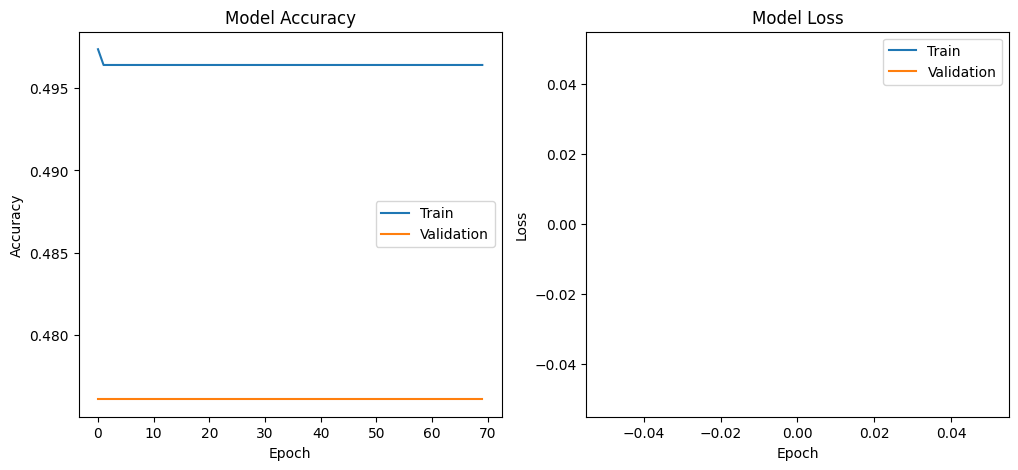

In [58]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
# ==============================================================
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

## Save the Model
Save the trained model for submission.

In [59]:
model.save('ANN_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: